## Motivation
Train/test split provides a high variance estimate, since changing which observations are in each set can significantly change testing accuracy.

In [67]:
# imports
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [68]:
# load iris data
iris = load_iris()
X = iris.data
y = iris.target

In [69]:
# random_state acts like a seed function and insures that the data
# is split the same way every time the function is run; use the default
# test set proportion of .25; change random_state to see how accuracy
# varies a lot from one run to the next
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=2)

In [70]:
# KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))

1.0
[[16  0  0]
 [ 0 11  0]
 [ 0  0 11]]


### K-fold Cross-Validation

In [71]:
# k-fold CV repeats the train/test split k times
# for classification problems, stratified sampling is recommended for creating the folds
# so that each response class is proportionally represented in a fold
# KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [72]:
# use average accuracy as an estimate of OOS accuracy
print(scores.mean())

0.966666666667


In [73]:
# search for an optimal value of K for KNN
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

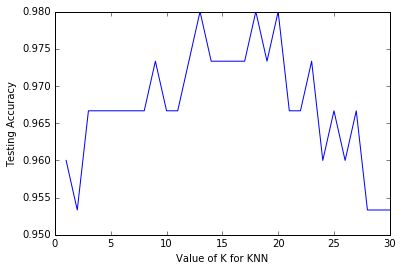

In [74]:
# llow plots to appear inline
%matplotlib inline

# plot relationship between K and testing accuracy
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [75]:
# k-fold CV repeats the train/test split k times
# for classification problems, stratified sampling is recommended for creating the folds
# so that each response class is proportionally represented in a fold
# KNN with K=5
knn = KNeighborsClassifier(n_neighbors=13)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores.mean())

0.98


High values of K produce high-bias / low-variance models and vice versa for low values of K.

## Cross-validation for model selection
Compare the best KNN model with logistic regression on the iris dataset.

In [76]:
# 10-fold CV with best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.98


In [77]:
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.953333333333


## Cross-validation for feature selection

In [78]:
data = pd.read_csv('Advertising.csv', index_col=0)
feature_cols = ['TV','Radio','Newspaper']
X = data[feature_cols]
y = data.Sales

In [79]:
# 10-fold CV with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [80]:
# fix the sign of MSE scores; we want lowest value of loss function; cross_val_score seeks
# the highest value of a reward score, so they multiply MSE by -1
mse_scores = -scores
print(mse_scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [83]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)
print(rmse_scores.mean())

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]
1.69135317081


In [84]:
# 10-fold CV with only two features
feature_cols = ['TV','Radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='mean_squared_error')).mean())

1.67967484191


Simpler model has lower RMSE.

## Improvements to CV
- Repeated CV
- Create a hold-out set; use CV to build model and test it on hold-out set
